# Problem 2: Good fit

A linear behavior of extinction vs. concentration (volume) signifies validity of the Lambert-Beer law. The Lambert-Beer law is only valid for dilute solutions, which explains the deviation of the large-volume data points from linear behavior.
Please carry out the linear regression using fewer points to obtain a better fit. How many points should be used for a good fit? What is the error in comparison to a fit using all data points?


# Solution 2:

If we re-formulate the problem in terms of the modeling workflow, the task here really is the validation step for the linear model of the Lambert-Beer law. We need to find out for how many points (or the respective sample volume) the model is valid and when it breaks down.   

First read in the data and repeat the plot as in the problem. 

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import array, sqrt

# first read in the (experimental) data

myx=[]
myy=[]

with open('data.dat') as f:
    for line in f:
        myx.append(float(line.split()[0]))
        myy.append(float(line.split()[1]))

# and feed it to the interpolator:

x = array(myx)
y = array(myy)

slope, intercept, r, p, std_err = stats.linregress(x,y)

print('Slope a {:.3f}, intercept b {:3f}, Pearsons correlation coefficient r {:3f};'.format(slope,intercept,r))
print('standard error of slope {:3f}'.format(std_err))


Slope a 0.033, intercept b 0.049807, Pearsons correlation coefficient r 0.989551;
standard error of slope 0.002130


Plot for the first time: 

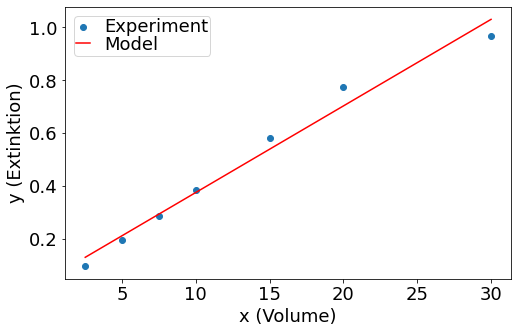

In [2]:


# font size
mf = 18

# create figures and axis
fig, ax = plt.subplots(figsize=(8,5))


ax.scatter(x,y,label='Experiment' )
ax.plot(x,slope*x+intercept,label='Model', color='r')

ax.set_xlabel('x (Volume)', fontsize=mf)
ax.set_ylabel('y (Extinktion)', fontsize=mf)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# add a legend
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)


plt.show()

To find out for which number of points the linear model is valid we remove data points from the high concentrations side. But we need to quantify the quality of the model. We can, for instance, record two properties for evaluating the quality of the model: the correlation coefficient that is returned form the scipy routine or the mean-square-error. The mean-square-error is an average error per point:

\begin{align}
\left<\Delta y_n^2\right> & = \frac{1}{n}\sum_i^n (\Delta y_i)^2
\end{align}

\begin{align}
\Delta y_i = y_i - \left( mx_i + b \right)
\end{align}

with $m$ and $b$ being slope and intercept from the linear fit, respectively.

In [3]:
# let's define a function that calculates the mean square error
# which is the average squared error per sample. 

def errmeansquare(x,y,slope, intersept):
    """
    Returns the mean of the squared differences 
    between model and experiment.
    """
    
    meansquare = ((y-(slope*x + intercept))**2).sum()/len(x)

    return meansquare
    
    

We can now loop through all numbers of data points starting from 3 as the minimum number (for two points the model would fit perfectly and the validation is meaningless) and record the mean-square-error and the correlation coefficient.

In [4]:
npoints = len(x)
nmin=3

meansquarevals = []
rvals = []
nvals = []

for n in range(nmin, npoints+1): # +1 otherwise the last point would be skipped
    
    myx_n=[]
    myy_n=[]
    
    for i in range(n):
        myx_n.append(myx[i])
        myy_n.append(myy[i])
    
    x_n = array(myx_n)
    y_n = array(myy_n)
    
    slope, intercept, r, p, std_err = stats.linregress(myx_n,myy_n)

    meansquare = errmeansquare(x_n,y_n,slope, intercept)
        
    meansquarevals.append(meansquare)
    rvals.append(r)
    nvals.append(n)

print(meansquarevals)
print(rvals)
print(nvals)

[8.888888888888967e-07, 8.000000000000125e-07, 7.783783783783864e-07, 7.124183006536095e-07, 0.0017990932475884258]
[0.9999276698852622, 0.999965567109693, 0.9999859400857056, 0.9999932948080066, 0.9895505884742958]
[3, 4, 5, 6, 7]


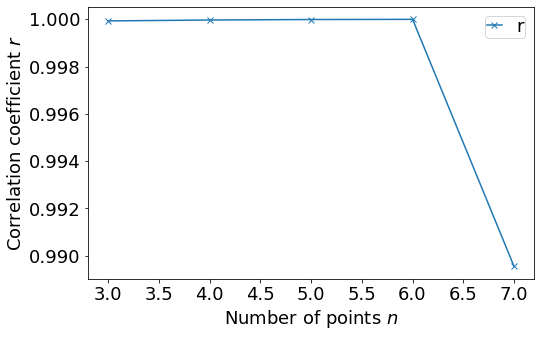

In [5]:
# create figures and axis
fig, ax = plt.subplots(figsize=(8,5))


ax.plot(nvals,rvals,label='r', marker='x' )


ax.set_xlabel(r'Number of points $n$', fontsize=mf)
ax.set_ylabel('Correlation coefficient $r$', fontsize=mf)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# add a legend
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)


plt.show()

The correlation coeffiction is essentially 1 for all numbers of points except if we include the last point. A correlatopn coefficient of $r=1$ means the data is perfectly correlated - as it should be for a linear dependence. Following the analysis of the correlation coefficient we would have to remove the last point for a good fit.  

Repeat the analysis for the mean-square-error:

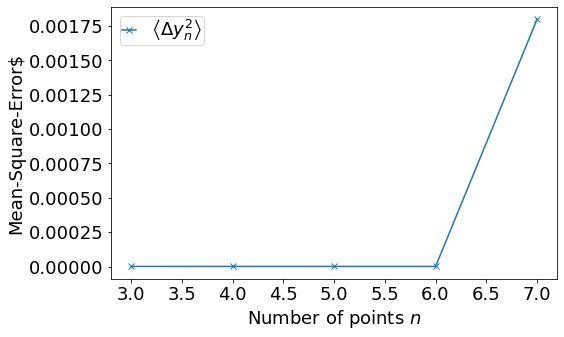

In [6]:
# create figures and axis
fig, ax = plt.subplots(figsize=(8,5))


ax.plot(nvals,meansquarevals,label=r'$\left<\Delta y_n^2\right>$', marker='x' )


ax.set_xlabel(r'Number of points $n$', fontsize=mf)
ax.set_ylabel('Mean-Square-Error$', fontsize=mf)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# add a legend
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)


plt.show()

The mean-square-error is essentially 0 except if we include the last point.  Following this analysis we would also have to remove only the last point for a good fit.  

We should be able to confirm this be re-doing the fit with the last point removed and plotting the model together with the experimental data:

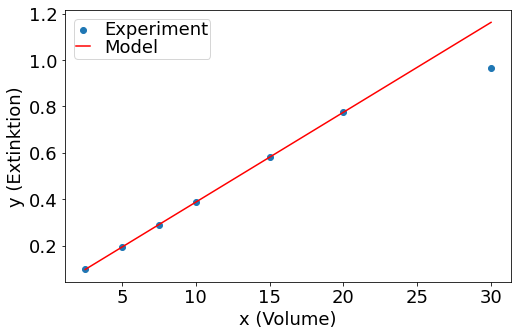

In [7]:
myx_6=[]
myy_6=[]
    
for i in range(npoints-1): # does not inclide the last point
    myx_6.append(myx[i])
    myy_6.append(myy[i])
    

    
slope, intercept, r, p, std_err = stats.linregress(myx_6,myy_6)

# create figures and axis
fig, ax = plt.subplots(figsize=(8,5))


ax.scatter(x,y,label='Experiment' )
ax.plot(x,slope*x+intercept,label='Model', color='r')

ax.set_xlabel('x (Volume)', fontsize=mf)
ax.set_ylabel('y (Extinktion)', fontsize=mf)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# add a legend
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)


plt.show()

We have not validated the model with two different methods  

We see that the model is valid up to approximately $x=20$. 